In [2]:
%matplotlib inline
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%pwd

u'/Users/mdymshits/time_series_experiments/ts_k/astn/final'

## Reading data
shuffling and splitting into Train and Test.

In [71]:
data = pd.read_csv('../data/market_data.csv').drop(columns=['Unnamed: 0', 'Time'])
num_of_ts = data.shape[1]
data_numpy = data.values.T
np.random.shuffle(data_numpy)
train = data_numpy[:num_of_ts/2, :]
test = data_numpy[num_of_ts/2:, :]

## Functions

In [157]:
def min_max_estimator_training(data, parameters_to_check):
    """Evaluate traind strategy for a given set of parametrs.
       "Trading Strategy" is by when the value is close to min and to
       to sell when it is close to maximum.
    """
    cost_function = []
    min_gap, max_gap = min_max_diff(data)
    
    for n in parameters_to_check:        
        cost_function_n = min_max_inference(data, min_gap, max_gap, parameter=n)
        cost_function.append(cost_function_n)
        print 'We have earned {:.3f} with gap parameter = {:.2f}'.format(cost_function_n, n)            
    return cost_function


def min_max_diff(data):
    """
    Calculate difference in between minimum in first half of time series to second part.
    The same for maximum.
    """
    first, second = data[:, :60], data[:, 60:]
    min_diff = np.min(first, axis=1) - np.min(second, axis=1)
    max_diff = np.max(first, axis=1) - np.max(second, axis=1)

    return np.std(min_diff), np.std(max_diff)


def min_max_inference(data, min_gap, max_gap, parameter):
    """
    Calculater cost function (revenue), given all parameters
    """
    n = parameter
    trade = np.zeros((data.shape[0], 2), dtype=float)
    for i in range(data.shape[0]):
        first_min, first_max = data[i, :60].min(), data[i, :60].max()
        min_achieved = False
        for val in data[i, 60:]:
            if val < first_min + n * min_gap:
                trade[i, 0] = val
                min_achieved = True
            if min_achieved and val > first_max - n * max_gap:
                trade[i, 1] = val
                break
                
    cost_function_n = np.sum(trade[:, 1] - trade[:, 0])
    return cost_function_n

## Training

In [153]:
np.linspace(2.5, 3.5, 20)

array([2.5       , 2.55263158, 2.60526316, 2.65789474, 2.71052632,
       2.76315789, 2.81578947, 2.86842105, 2.92105263, 2.97368421,
       3.02631579, 3.07894737, 3.13157895, 3.18421053, 3.23684211,
       3.28947368, 3.34210526, 3.39473684, 3.44736842, 3.5       ])

In [156]:
len(parameters_to_check)

20

In [159]:
parameters_to_check = np.linspace(2.5, 3.5, 10)
cost_function = min_max_estimator_training(train, parameters_to_check)

20
We have earned 0.200 with gap parameter = 2.50
We have earned 0.207 with gap parameter = 2.55
We have earned 0.222 with gap parameter = 2.61
We have earned 0.235 with gap parameter = 2.66
We have earned 0.248 with gap parameter = 2.71
We have earned 0.253 with gap parameter = 2.76
We have earned 0.251 with gap parameter = 2.82
We have earned 0.258 with gap parameter = 2.87
We have earned 0.259 with gap parameter = 2.92
We have earned 0.262 with gap parameter = 2.97
We have earned 0.256 with gap parameter = 3.03
We have earned 0.256 with gap parameter = 3.08
We have earned 0.250 with gap parameter = 3.13
We have earned 0.240 with gap parameter = 3.18
We have earned 0.232 with gap parameter = 3.24
We have earned 0.221 with gap parameter = 3.29
We have earned 0.210 with gap parameter = 3.34
We have earned 0.198 with gap parameter = 3.39
We have earned 0.188 with gap parameter = 3.45
We have earned 0.173 with gap parameter = 3.50


### Let's plot the cost function (revenue)

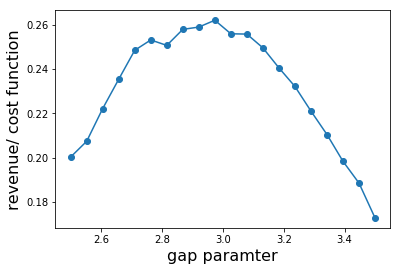

In [161]:
plt.plot(parameters_to_check, cost_function, marker='o');
plt.xlabel('gap paramter', fontsize=16);
plt.ylabel('revenue/ cost function', fontsize=16);

# Testing

In [163]:
min_gap, max_gap = min_max_diff(train)
min_max_inference(test, min_gap, max_gap, parameter=2.95)

0.266701163

We have earned 0.267 with gap parameter = 2.95

## Conclustion for Method 1

The results are for test are almost the same as for train.
For full data set it should be:

$$ 0.267 \cdot 2 \approx .53 $$